In [33]:
!pip install pandas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [36]:
# Εισάγω το xlsx αρχείο το οποίο αναφέρεται στην Κατάσταση απασχόλησης και το ποσοστό ανεργίας (Ιανουαρίου 2004 - Μαρτίου 2020) από την Ελληνική Στατιστική Αρχή (ΕΛΣΤΑΤ)

df = pd.read_excel("/gdrive/My Drive/A0101_SJO02_TS_MM_01_2004_03_2020_01A_F_GR.xlsx", sep="\t", skiprows=2)
df

,2004,Απασχολούμενοι,Άνεργοι,Μη ενεργοί,Ποσοστό ανεργίας,Απασχολούμενοι.1,Άνεργοι.1,Μη ενεργοί.1,Ποσοστό ανεργίας.1
0,Ιανουάριος,4320.3,579,3560.7,11.8,4349.6,538,3572.4,11
1,Φεβρουάριος,4345.1,543.7,3572,11.1,4363.3,528.1,3569.2,10.8
2,Μάρτιος,4306.6,552,3602.9,11.4,4372.7,526.1,3562.7,10.7
3,Απρίλιος,4408.7,529.4,3524.4,10.7,4387.2,519.9,3555.5,10.6
4,Μάιος,4417.2,500.7,3545.2,10.2,4379.5,519.9,3563.8,10.6
5,Ιούνιος,4380.7,490.5,3592.8,10.1,4378.9,517.2,3567.8,10.6
6,Ιούλιος,4412.9,501.8,3550.2,10.2,4377.4,518.8,3568.6,10.6
7,Αύγουστος,4423.5,502.7,3539.5,10.2,4384.1,516.5,3565.1,10.5
8,Σεπτέμβριος,4387.2,495.3,3584.1,10.1,4384.5,512.5,3569.7,10.5
9,Οκτώβριος,4422.5,489.2,3555.9,10,4392.9,509.9,3564.7,10.4


In [37]:
df.shape

(220, 9)

In [38]:
# Δεν θέλω να έχει ... στη μέση

pd.set_option("display.max_rows",220)

In [39]:
# Φτιάχνω μια λίστα με τα ονόματα των τιμών που λείπουν και καθαρίζω το αρχείο μου από κενές τιμές (την ώρα που φορτώνεται το αρχείο)

missing_values = ["n/a", "na", "--", 999] 
 
df = pd.read_excel("/gdrive/My Drive/A0101_SJO02_TS_MM_01_2004_03_2020_01A_F_GR.xlsx", sep="\t", skiprows = 2, na_values = missing_values, inplace=True)

In [40]:
df.dropna(inplace=True)

In [41]:
df.drop(['Απασχολούμενοι', 'Άνεργοι', 'Μη ενεργοί', 'Ποσοστό ανεργίας'], axis=1, inplace=True)

In [42]:
df

,2004,Απασχολούμενοι.1,Άνεργοι.1,Μη ενεργοί.1,Ποσοστό ανεργίας.1
0,Ιανουάριος,4349.6,538,3572.4,11
1,Φεβρουάριος,4363.3,528.1,3569.2,10.8
2,Μάρτιος,4372.7,526.1,3562.7,10.7
3,Απρίλιος,4387.2,519.9,3555.5,10.6
4,Μάιος,4379.5,519.9,3563.8,10.6
5,Ιούνιος,4378.9,517.2,3567.8,10.6
6,Ιούλιος,4377.4,518.8,3568.6,10.6
7,Αύγουστος,4384.1,516.5,3565.1,10.5
8,Σεπτέμβριος,4384.5,512.5,3569.7,10.5
9,Οκτώβριος,4392.9,509.9,3564.7,10.4


In [43]:
# Μετονομάζω τις στήλες που με ενδιαφέρουν

df.rename(columns={ 2004 : 'Μήνας', 'Απασχολούμενοι.1' : 'Απασχολούμενοι', 'Άνεργοι.1' : 'Άνεργοι', 'Μη ενεργοί.1': 'Μη ενεργοί', 'Ποσοστό ανεργίας.1' : 'Ποσοστό ανεργίας'}, inplace=True)

In [44]:
df

,Μήνας,Απασχολούμενοι,Άνεργοι,Μη ενεργοί,Ποσοστό ανεργίας
0,Ιανουάριος,4349.6,538,3572.4,11
1,Φεβρουάριος,4363.3,528.1,3569.2,10.8
2,Μάρτιος,4372.7,526.1,3562.7,10.7
3,Απρίλιος,4387.2,519.9,3555.5,10.6
4,Μάιος,4379.5,519.9,3563.8,10.6
5,Ιούνιος,4378.9,517.2,3567.8,10.6
6,Ιούλιος,4377.4,518.8,3568.6,10.6
7,Αύγουστος,4384.1,516.5,3565.1,10.5
8,Σεπτέμβριος,4384.5,512.5,3569.7,10.5
9,Οκτώβριος,4392.9,509.9,3564.7,10.4


In [45]:
df_2004 = df.iloc[0:12, :]
df_2004

,Μήνας,Απασχολούμενοι,Άνεργοι,Μη ενεργοί,Ποσοστό ανεργίας
0,Ιανουάριος,4349.6,538,3572.4,11
1,Φεβρουάριος,4363.3,528.1,3569.2,10.8
2,Μάρτιος,4372.7,526.1,3562.7,10.7
3,Απρίλιος,4387.2,519.9,3555.5,10.6
4,Μάιος,4379.5,519.9,3563.8,10.6
5,Ιούνιος,4378.9,517.2,3567.8,10.6
6,Ιούλιος,4377.4,518.8,3568.6,10.6
7,Αύγουστος,4384.1,516.5,3565.1,10.5
8,Σεπτέμβριος,4384.5,512.5,3569.7,10.5
9,Οκτώβριος,4392.9,509.9,3564.7,10.4


In [46]:
df_2005 = df.iloc[13:25, :]
df_2005

,Μήνας,Απασχολούμενοι,Άνεργοι,Μη ενεργοί,Ποσοστό ανεργίας
13,Ιανουάριος,4408.2,497.5,3564.5,10.1
14,Φεβρουάριος,4438.7,491.6,3540.5,10
15,Μάρτιος,4415.6,493.7,3562.2,10.1
16,Απρίλιος,4425,493.5,3553.8,10
17,Μάιος,4440.5,495.1,3537.4,10
18,Ιούνιος,4424.9,497.2,3551.9,10.1
19,Ιούλιος,4426.7,501.8,3546.2,10.2
20,Αύγουστος,4433.7,503.9,3537.7,10.2
21,Σεπτέμβριος,4438.4,502.9,3534.9,10.2
22,Οκτώβριος,4446,495.2,3535.8,10


In [47]:
df_2006 = df.iloc[26:38, :]
df_2007 = df.iloc[39:51, :]
df_2008 = df.iloc[52:64, :]
df_2009 = df.iloc[65:77, :]
df_2010 = df.iloc[78:90, :]
df_2011 = df.iloc[91:103, :]
df_2012 = df.iloc[104:116, :]
df_2013 = df.iloc[117:129, :]
df_2014 = df.iloc[130:142, :]
df_2015 = df.iloc[143:155, :]
df_2016 = df.iloc[156:168, :]
df_2017 = df.iloc[169:181, :]
df_2018 = df.iloc[182:194, :]
df_2019 = df.iloc[195:207, :]
df_2020 = df.iloc[208:220, :]

In [48]:
# Πραγματοποιώ κάποιες αναλύσεις στα αριθμητικά δεδομένα (στην προκειμένη περίπτωση με ενδιαφέρει να βρω το μέσο όρο του συνόλου του ποσοστού της ανεργίας ανά έτος)

df_2004['Ποσοστό ανεργίας'].mean()

10.583333333333334

In [49]:
df_2005['Ποσοστό ανεργίας'].mean()

10.016666666666667

In [50]:
df_2006['Ποσοστό ανεργίας'].mean()

9.008333333333335

In [51]:
df_2007['Ποσοστό ανεργίας'].mean()

8.416666666666666

In [52]:
df_2008['Ποσοστό ανεργίας'].mean()

7.791666666666668

In [53]:
df_2009['Ποσοστό ανεργίας'].mean()

9.658333333333333

In [54]:
df_2019['Ποσοστό ανεργίας'].mean() 

17.316666666666666

In [55]:
df_2020['Ποσοστό ανεργίας'].mean()

15.533333333333333

In [56]:
new_df = pd.merge(df_2019, df_2020, how='outer', on=['Μήνας'])

In [57]:
new_df

,Μήνας,Απασχολούμενοι_x,Άνεργοι_x,Μη ενεργοί_x,Ποσοστό ανεργίας_x,Απασχολούμενοι_y,Άνεργοι_y,Μη ενεργοί_y,Ποσοστό ανεργίας_y
0,Ιανουάριος,3864.9,877.2,3210.9,18.5,3900.8,758.6,3247.1,16.3
1,Φεβρουάριος,3864.4,871.1,3213.3,18.4,3884.7,733.1,3286.2,15.9
2,Μάρτιος,3887.4,857,3200.1,18.1,3874.4,653.7,3373.4,14.4
3,Απρίλιος,3905.6,832.4,3203.3,17.6,NaN,NaN,NaN,NaN
4,Μάιος,3912.8,818.7,3205.5,17.3,NaN,NaN,NaN,NaN
5,Ιούνιος,3915.8,811,3205.7,17.2,NaN,NaN,NaN,NaN
6,Ιούλιος,3906.3,806.5,3216.1,17.1,NaN,NaN,NaN,NaN
7,Αύγουστος,3915,799.5,3210.8,17,NaN,NaN,NaN,NaN
8,Σεπτέμβριος,3918.4,796.4,3206.4,16.9,NaN,NaN,NaN,NaN
9,Οκτώβριος,3909.1,785.1,3223.5,16.7,NaN,NaN,NaN,NaN


In [58]:
new_df.rename(columns={'Ποσοστό ανεργίας_x' : 'Ποσοστό ανεργίας_2019', 'Ποσοστό ανεργίας_y' : 'Ποσοστό ανεργίας_2020'}, inplace=True)

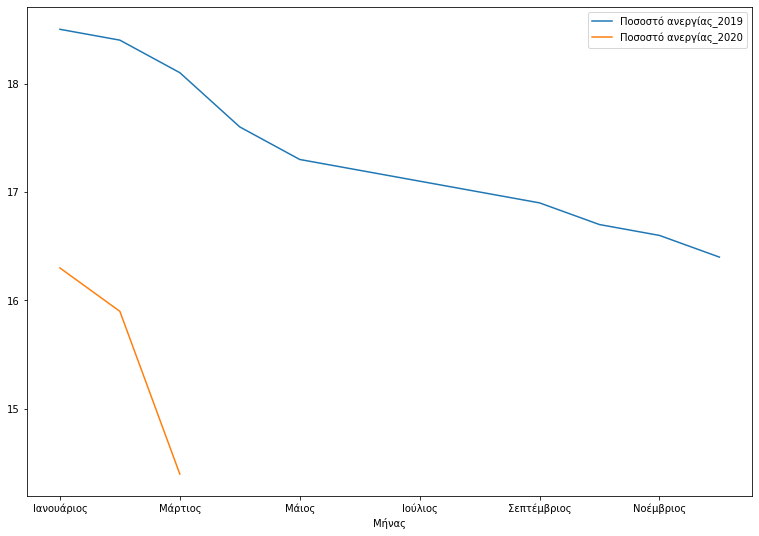

In [59]:
# Δημιούργω ένα γράφημα με το Ποσοστό ανεργίας το 2019 και το 2020 σε σχέση με τους μήνες

new_df[['Μήνας', 'Ποσοστό ανεργίας_2019', 'Ποσοστό ανεργίας_2020']].plot(x='Μήνας', figsize=(13, 9))

In [60]:
# Στη συνέχεια, βρήκα στοιχεία από τις οικονομικές προβλέψεις της Ευρωπαϊκής Επιτροπής(European Economic Forecast. Spring 2020) για την Ελλάδα σε σχέση με την ανεργία.

# Από τον πίνακα του pdf https://ec.europa.eu/economy_finance/forecasts/2020/spring/ecfin_forecast_spring_2020_el_en.pdf εξήγαγα πληροφορίες σχετικά με την ανεργία στην Ελλάδα από το 2016 - 2021

# Unemployment rate (a)

data = pd.DataFrame([[2016, 23.6],[2017, 21.5],[2018, 19.3],[2019, 17.3],[2020, 19.9], [2021, 16.8]])

data

,0,1
0,2016,23.6
1,2017,21.5
2,2018,19.3
3,2019,17.3
4,2020,19.9
5,2021,16.8


In [61]:
data.rename(columns={0 : 'Έτος', 1: 'Annual percentage change'}, inplace=True)

In [62]:
data

,Έτος,Annual percentage change
0,2016,23.6
1,2017,21.5
2,2018,19.3
3,2019,17.3
4,2020,19.9
5,2021,16.8


In [63]:
data.to_excel(r'/gdrive/My Drive/Annual_percentage_change.xlsx', index = False)

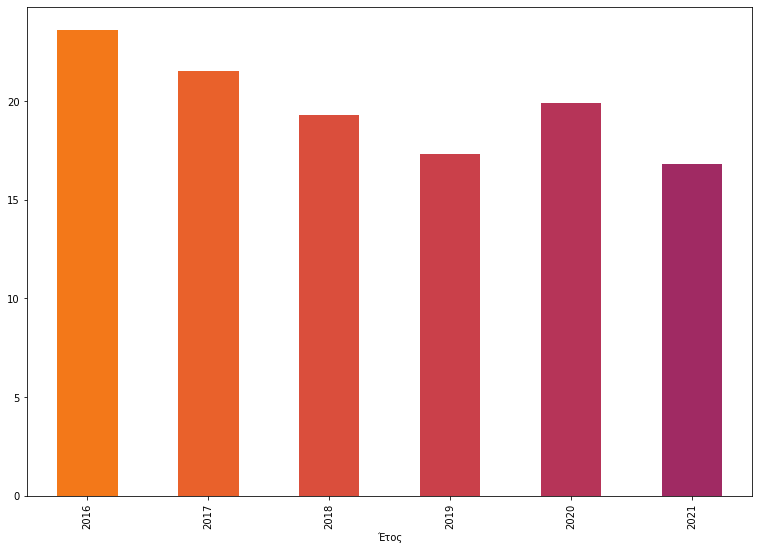

In [64]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.3, 4, 70))
color

data.sort_values(ascending=True, by= 'Έτος').plot(x='Έτος', y='Annual percentage change', kind='bar', color=color, legend=False, figsize=(13, 9))